<a href="https://colab.research.google.com/github/riotrip/ml-smt5/blob/main/LAT_JSO7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rio Tri Prayogo - 2341720236 - TI 3F/25**
---
## **JS07 - Approximate Nearest Neighbors (ANN)**

### Praktikum 1

Exact NN vs. ANNOY

**Langkah 1 - Install Library ANNOY**

In [ ]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551807 sha256=67c4e48b92c8d4c39bf07570f69df3871fbf0aa74a3a3fee9c424869b9dfd3ff
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


**Langkah 2 - Import Library**

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

**Langkah 3 - Membuat Dataset Dummy**

Membuat dataset dummy dan memilih titik awal untuk cluster (query point).

In [ ]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

**Langkah 4 - Exact NN**

Mengkomputasi jarak terdekat dengan menggunakan metode brute force.

In [ ]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 8.1031 ms


**Langkah 5 - Perhitungan Jarak dengan ANNOY**

Membandingkan dengan ANNOY. Jumlah Tree yang digunakan adalah 3.

In [ ]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1392 ms


Dapat dilihat perbedaan waktu yang sangat signifikan. ANNOY hanya memerlukan waktu 0.13ms sedangkan NN konvensional mencapai 9.17ms.

**Langkah 6 - Visualisasi Hasil NN**

Untuk mengetahui tingkat ketepatan prediksi NN dari ANNOY, lakukan proses visualisasi sehingga Anda dapat mengetahui titik exact NN dibandingkan dengan perkiraan NN dari ANNOY.

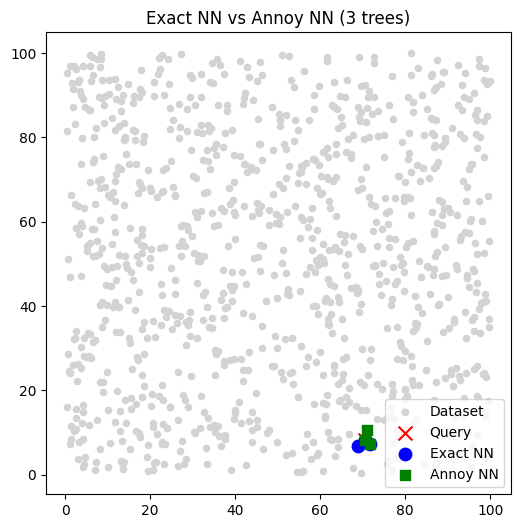

In [ ]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Terlihat bahwa ANNOY tidak memilih NN tepat seperti exact NN. Akan tetapi, posisi ini sudah cukup untuk kebutuhan pencarian kedekatan dengan jumlah data yang besar dengan kompensasi waktu yang lebih cepat. Ingat, tujuan utama ANNOY adalah mencari titik balance antara akurasi klasterisasi dan kecepatan.

### Praktikum 2

Exact NN vs. FAISS

**Langkah 1 - Instal FAISS**

In [ ]:
!pip install faiss-cpu
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 63.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


**Langkah 2 - Import Library**

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

**Langkah 3 - Membuat Dummy Dataset**

In [ ]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

**Langkah 4 - Buat Model Exact NN**

In [ ]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

**Langkah 5 - Buat Model FAISS**

In [ ]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

**Langkah 6 - Cek Hasil Performa**

In [ ]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.000385284423828125
Waktu IVF+PQ: 0.00017642974853515625


FAISS dapat mengungguli exact NN dengan nilai yang tipis. Namun ingat, kita belum mencoba dengan data yang lebih besar. Data dummy yang digunakan hanya 1000x1000.

**Langkah 7 - Visualisasi**

Untuk lebih jelas mengetahui perkiraan NN yang dibuat oleh FAISS, Anda dapat melakukan visualisasi.

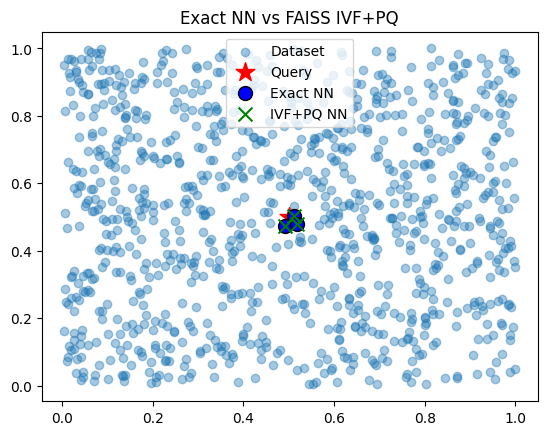

In [ ]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

### Praktikum 3

Exact NN vs. HNSW

**Langkah 1 - Instal Library**

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528146 sha256=9c3f28100d81ad251bc17bd3d0a2879081a401e49953d9056d326e924ef9ae81
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


**Langkah 2 - Import Library**

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

**Langkah 3 - Buat Dataset Dummy**

In [ ]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

**Langkah 4 - Buat Model NN**

In [ ]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.0762178897857666 s


**Langkah 5 - Buat Model HNSW**

In [ ]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00025177001953125 s


### Praktikum 4

ANNOY vs. FAISS vs. HNSW

Percobaan kali ini kita akan melihat perbedaan ketiga model yang telah kita bahas dan bandingkan hasilnya.

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 21.53885269165039 detik
Query time: 0.00018644332885742188 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.01485753059387207 detik
Query time: 0.0063860416412353516 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 180.73540329933167 detik
Query time: 0.0007023811340332031 detik
Neighbors: [129179 559276 630783 213191 559393] ...


### Praktikum 5

Uji Performansi ANN dengan Recall Query

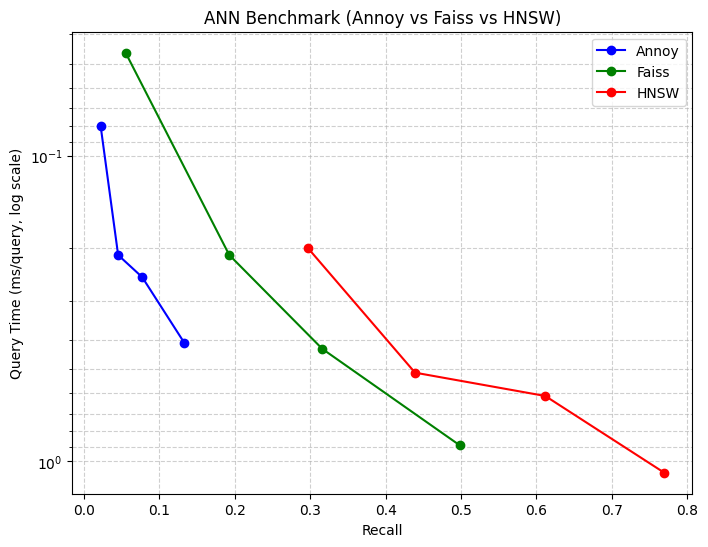

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()